# Introduction

Welcome to NEUS634! The course staff includes:

* Brad Buran (buran@ohsu.edu)
* Stephen David (davids@ohsu.edu)
* Erik Burlingame (burlinge@ohsu.edu)
* Charlie Heller (hellerc@ohsu.edu)

Both Erik and Charlie have another course that slightly overlaps with this one, so they will only be availble during the first hour of class. Outside of class hours, all of us will be available via email and <a href="https://gitter.im/NEUS642/Lobby">Gitter</a> if you have any questions. While you are welcome to email the course staff directly, we prefer that Python-related questions be posted to the NEUS642 chatroom on Gitter. We do not have as large of a course staff as we would like given the number of students in the class, so we hope that Gitter will help us manage our time effectively. In addition, you may learn from our answers to questions posted by other students and are  encouraged to answer each other's questions.

There are many ways to run Python. For the course, we will be using a hosted version of Python available at https://exajupyter.ohsu.edu. However, we would like to ensure that you are able to run Python on your own computer by the end of the course and have included <a href="https://github.com/bburan/NEUS642/blob/master/syllabus.md#installing-python">instructions in the syllabus</a>. In your spare time, please try to install Python on your computer. If you have any questions, let us know on Gitter.

# How classes will work

Each week you or one of your classmates will lead an exercise on a data analysis problem relevant to neuroscience. Be sure that you provide sufficient background information at the beginning of the exercise for a neuroscientist to understand the problem. Throughout the exercise there will be points at which we stop and give the class the opportunity to write the solution for a particular question. At that point, we will stop for 5 to 15 minutes while you try and solve the problem (either individually or in groups).

You'll notice that we've provided you with both green and red post-it notes. If you need help during the class, stick the red post-it note on the back of your computer and someone will come help you. Once you've completed the exercise, please place the green post-it note on the back of your computer so we know when everyone's ready to move on.

# Today

Today we will start with a simple exercise that will help you get oriented to the resources available to you. First, please sign into the NEUS642 chatroom on <a href="https://gitter.im/NEUS642/Lobby">Gitter</a> at https://gitter.im/NEUS642/Lobby. Once you've signed in, please place your green post-it note on your laptop.

Now, let's <a href="https://bburan.github.io/NEUS642/exajupyter.html">login and setup your exajupyter account</a>. Once you've performed those steps, find this notebook and open it. Once you've opened the notebook, please place the green post-it on your laptop.

# Exercise

## Goals

Demonstrate how programming using Python and dataframes can simplify many data operations commonly performed in spreadsheets. Dataframes are a special data format commonly used in Python for manipulating tabular or spreadsheet-like data. They support a number of operations including:

1. Reshaping the data.
2. Merging two datasets on a common column or set of columns.
3. Grouping data and computing a statistic on the group.

Dataframes are provided using a Python library called `pandas`. In the code I've imported `pandas` as `pd` for short. This two-letter abbreviation is a common convention in scientific Python programming (you'll often see `numpy`  imported as `np` and `scipy` as `sp`). Since Pandas is a third-party library not included in the core Python distribution, you sometimes have to explicitly install it. For this course, we have ensured that Pandas is installed on the server. However, if you try to replicate the code using your own Python install, you may have to install Pandas using `conda install pandas`.

## The data

Noise exposure can cause hearing damage. Sometimes this damage is temporary, sometimes it is permanent. We can assess hearing thresholds in animals by measuring the auditory brainstem response (ABR). The ABR is an event-related potential reflecting the activity of the auditory nerve in response to a brief tone. By presenting tones of varying loudness (the unit is dB SPL), we can define the animal's hearing threshold as the minimum level (dB SPL) at which we can detect the ABR.

To assess hearing damage caused by noise exposure, we can measure ABR thresholds before noise-exposure, one day after noise-exposure and two weeks after noise-exposure. We have a set of animals that have been exposed to different levels of noise (104, 110 or 114 dB SPL). In this exercise, we will calculate and plot the mean threshold shift (i.e., the difference between post-exposure ABR threshold and pre-exposure ABR threshold).

The data is saved in two spreadsheets. The first contains the information on the noise-exposure for each animal and the second contains the ABR threshold measurements.

# The analysis

## Setting up the code

At the beginning of every Python script we need to import all the libraries we need and define a few variables.

In [ ]:
# This ensures that plots are shown below each code cell
%matplotlib inline

# Import the library we're using for this exercise
import pandas as pd

# For brevity, limit the number of rows displayed
pd.options.display.max_rows = 7

## Read in the data

Since Pandas provides a function for reading multiple file formats, including CSV, reading in the exposure data is very simple.

In [ ]:
exposure_data = pd.read_csv('exposure_data.csv')
exposure_data

This looks pretty good, but there's a bit of redundancy here. There's one row for each animal. The animals are numbered 1 through 38 as shown by the `animal` column. However, Pandas has automatically created an index indicating the row numbers. All dataframes have an index which uniquely identifies each row. By default, the index is just the row number. Note that the row-numbering starts at 0, which is a typical convention in Python. In some programming languages (i.e., Matlab), numbering typically starts at 1.

A dataframe index does not have to be a simple row number based scheme as long as the label for that row is unique. The label can be any immutable value (e.g., a string). Why not just use the animal ID as the index? Is there a way we can tell Pandas to use the `animal` column as the index? Perhaps the `read_csv` function has a parameter that allows you to specify this.  You can look up the documentation for any function in the IPython prompt by putting a question mark, `?`, after the name of the function:

    pd.io.parsers.read_csv?
   
Ok, now try it. What do you get?



In [ ]:
# pd.io.parsers.read_csv?

### Exercise 1

That's a lot of parameters for `read_csv`! Take a minute to read through the documentation. Does anything sound like it might let us specify what column to use as the index? Now, try modifying the code below to set the `animal` column as the index. Remember that Python uses a zero-based numbering scheme. That means that the first column has an index of 0 and the second column has an index of 1.

In [ ]:
# Modify the code below to read in the dataframe as the index.
exposure_data = pd.read_csv('exposure_data.csv')
exposure_data

# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col=0)
exposure_data

Let's discuss some terminology first:

* A `dataframe` is a two-dimensional data structure aligned by rows and columns (i.e., a table). However, unlike Excel, you can specify your own row labels and column labels.

* A `series` is a one-dimensional data structure that has an index. When you extract a single row or column from a dataframe, a series is returned.

Let's take a closer look at this. You can extract a single value from the dataframe using the special `loc` attribute:

    value = dataframe.loc[row label, column label]
    
To extract an entire row:

    row = dataframe.loc[row label, :]
    
To extract an entire column:

    column = dataframe.loc[:, column_label]
    
The colon, `:`, is a special symbol that indicates to extract all values for that dimension. Let's go ahead and try extracting some data from th dataframe. What's the exposure date for Subject 10?   

In [ ]:
# Your answer goes here

# Answer
value = exposure_data.loc['Subject 10', 'exposure_date']
value

Now, try and extract the entire *row* for animal 10. How do you do this?

In [ ]:
# Your answer goes here

# Answer
row = exposure_data.loc['Subject 10', :]
row

Remember what we said earlier about the difference between a dataframe and a series. Is `row` a series or a dataframe?

Also, note how `row` is indexed. As with dataframes, you can pull out individual elements using the `loc` indexer.

In [ ]:
row.loc['exposure_date']

Now, pull out the `exposure_date` column for all animals.

In [ ]:
# Your answer goes here

# Answer
column = exposure_data.loc[:, 'exposure_date']
column

There's another problem. Let's take a closer look at a single value in the `exposure_date` column. 

In [ ]:
exposure_data.loc['Subject 10', 'exposure_date']

Note the quotation marks around the value. That means the value is a string. That's not very useful to us. We want the value to be a Python date object. That will allow us to perform date math (such as determine how many days are in between two dates). Let's go back to the `read_csv` function. Is there any way we can have the `read_csv` function parse the date strings into Python date objects for us?

Remember how to pull up documentation for the function?

In [ ]:
# Your answer goes here

# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col=0, parse_dates=['exposure_date'])
exposure_data.loc['Subject 10', 'exposure_date']

Note how it's now a `Timestamp`. That lets us do some very nice date-related math (which we will get to in a little bit). Now write the code to read in the `abr_thresholds.csv` file. This file does not have a single column that can be used as an index. There are ways to make combine multiple columns to form a special type of index known as a hierarchial index (i.e., `MultiIndex` in Pandas terminology). We will save this fo a future lecture. For now, let's just have Pandas automatically create a numbered index for us. Dates are stord in the `date` column.

In [ ]:
# Your answer goes here. Save the result in a variable called threshold_data.

# Answer
threshold_data = pd.read_csv('abr_thresholds.csv', parse_dates=['date'])
threshold_data

Now we can merge the ABR data with the exposure data. The goal is to end up with a single dataframe containing both the thresholds and exposure data. In the image below, the boxes shaded in grey are the row and column labels.

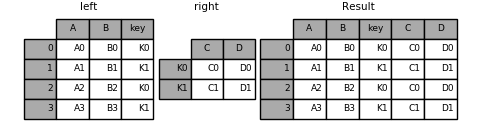

Remember that `exposure_data` is indexed by the animal ID because each row is data for a unique animal. We can use this index as a lookup value. For each row in `threshold_data`, we want to copy the values in the `exposure_date` and `exposure_level` from the corresponding row in `exposure_data` where the values for `animal` match. Pandas provides a method, `join`, that allows us to do this.

In [ ]:
data = threshold_data.join(exposure_data, on=['animal'])
data

## Calculating ABR threshold shift

The next step is to compute when the ABR threshold was measured relative to the exposure. We can do this by subtracting the date of the ABR (stored in the `date` column) from the exposure date (stored in the `exposure_date` column) and saving it as a new column, `days_re_exposure`. Yes, it's as simple as subtracting the two columns. Go ahead and try it. Hint, to create a new column:

    dataframe[column_name] = new_column_data

In [ ]:
# Your answer goes here

# Answer
data['days_re_exposure'] = data['date'] - data['exposure_date']
data

Nice. This is one of the advantages of making sure all your dates are represented properly in Python. It makes date math easy.

Next, we want to calculate the mean threshold for each exposure level before, one day after and 14 days after noise exposure. Pandas makes this easy with the `groupby` method. The method takes a list of columns to group by.

In [ ]:
grouping = data.groupby(['days_re_exposure'])
grouping

You can then take the mean value across all remaining columns.

In [ ]:
grouping.mean()

Alternatively, you can specify the column you wish to use.

In [ ]:
grouping['threshold'].mean()

We'd like to modify the groupby operation so we can calcuate the mean threshold for each exposure level and timepoint (-3, 1, and 14 days re. exposure). Go ahead and try it.

In [ ]:
# Modify the following code
grouping = data.groupby(['days_re_exposure'])
mean_thresholds = grouping['threshold'].mean()
mean_thresholds

# Answer
grouping = data.groupby(['exposure_level', 'days_re_exposure'])
mean_thresholds = grouping['threshold'].mean()
mean_thresholds

What format is the data in? Dataframe or series?

Now that we've calculated the group means, we want to plot the data. Fortunately, Pandas comes with a bunch of built-in plotting methods that makes life easy. Let's go ahead and try them!

In [ ]:
mean_thresholds.plot()

That's not really a very informative plot. We probably want a plot that plots the mean threshold for each `days_re_exposure` with a separate line for each `exposure_level`. How can we figure out what we need to do? The reason why we are getting the plot above is because Pandas, by default, uses the index labels as the x-values and creates a separate line for each column. So, somehow we need to create a separate column for each exposure level. Fortunately, that's really easy to do in Pandas using the `unstack` method.

In [ ]:
mean_thresholds_unstacked = mean_thresholds.unstack('exposure_level')
mean_thresholds_unstacked

In [ ]:
ax = mean_thresholds_unstacked.plot()

Looks much better. What if we want to make it a bar plot? What do we need to do? Remember how to look up the documentation for a function?

In [ ]:
# Your answer goes here

# Answer
ax = mean_thresholds_unstacked.plot(kind='bar')

Now, we'd like to add some error bars indicating the SEM. To do this, we need to first calculate the SEM for each group. Let's go back to the groupby object we made (`grouping`).

In [ ]:
grouping

Another feature of IPython is that you can look up what types of methods and attributes an object has by putting a dot after the variable and hitting the tab key:
    
    variable.<tab>
    
Go ahead and try it with `grouping`.

In [ ]:
# Your answer goes here

Now, scroll through the list that pops up. Does anything sound like a good candidate for calculating the SEM? How can you verify that it, indeed, will do what you want?

In [ ]:
# grouping.sem?

Great, now calculate the SEM for each `exposure_level` and `days_re_exposure` group. Be sure to reshape the result so that each exposure level is a separate column (i.e., the shape should match that of `mean_thresholds_unstacked`).

In [ ]:
# Your answer goes here

# Answer
sem_thresholds = grouping['threshold'].sem()
sem_thresholds_unstacked = sem_thresholds.unstack('exposure_level')
sem_thresholds_unstacked

Since we were careful to ensure that our `sem_thresholds_unstacked` dataframe has an identical index and set of columns as `mean_thresholds_unstacked`, it becomes much easier to add the errorbars using the built-in plotting functionality of Pandas. Go back to the `plot` method you used. Look at the documentation. Is there any way we can pass in the errorbar information to the plotting method? If so, go ahead and try it.

In [ ]:
# Modify the code below to pass in the errorbar information
ax = mean_thresholds_unstacked.plot(kind='bar')

# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)

Now, let's fix the X and Y axes. The `plot` method returned what's known as an axes object. This object represents the plot you just generated. Check to see if thre are any useful methods on this object that allow you to set the y and x axes label as well as the x ticklabels. Since there are a ton of methods available, skip ahead to the ones that begin with `set`:

    ax.set<tab>
    
We'd like to set the x-axis label to "Days re. exposure" and the y-axis label to "Threshold (dB SPL)". The tick labels may also look a bit better if they were simply '-3', '1' and '14'.

In [ ]:
# Your answer goes here
# Note, you need to copy the line that generated the plot from your answer above and paste it here to regenerate the plot.

# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)
ax.set_xlabel('Days re exposure')
ax.set_ylabel('Threshold (dB SPL)')
ax.set_xticklabels(['-3', '1', '14'])